In [1]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
import math

### A tutorial on formulate likelihood function to estimate parameters for given probability distributions

#### Let's try to first sample some gamma distributed random variables with shape = 2.0, scale = 0.5

See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html

gamma.rvs(a, loc=0, scale=1, size=1, random_state=None)

In [2]:
data_gamma = gamma.rvs(a = 2.0, loc = 0.0, scale = 0.5, size=100, random_state=0)

data_gamma

array([2.56941479, 1.11924046, 2.71356614, 0.34829322, 0.76846576,
       1.12746501, 1.42743348, 0.91436753, 1.15393596, 1.06780852,
       2.21764387, 0.70779536, 0.03299114, 1.33045069, 3.32481768,
       0.20294742, 2.26596274, 2.18714187, 0.38159363, 0.09717934,
       1.90646366, 1.87535393, 0.32320233, 0.2117172 , 0.54574625,
       0.5813365 , 0.16537881, 0.70341503, 0.37865572, 1.10885753,
       0.81527384, 1.14152566, 0.48727984, 0.62043045, 0.41093844,
       0.14190457, 0.16182469, 1.16917428, 1.39811415, 0.91939499,
       1.1209578 , 0.46484441, 0.64797075, 0.8701162 , 0.28480508,
       1.56054828, 1.17150582, 0.18302603, 1.84931438, 0.72250429,
       0.59923559, 1.89768437, 1.08518221, 1.37769199, 0.91796851,
       1.12068073, 0.25284435, 1.6287652 , 0.59384183, 0.43797797,
       2.71356751, 1.5656713 , 0.67203275, 1.4660516 , 1.29589044,
       1.58160974, 1.1006961 , 0.306059  , 1.0410501 , 2.0162011 ,
       0.58282071, 2.68770552, 0.42860323, 1.23213145, 0.48659

#### For continuous distribution, scipy.stats provides _fit_ function to help derive the parameters, so we can use it directly. 

gamma.fit(data, *args, * *kwds)

Let's first try the _fit_ function without any additional arguments or keywords.

See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit

In [3]:
result = gamma.fit(data_gamma)

result

(1.798216877996928, 0.009012144269749799, 0.5646102095488708)

In the result (a tuple type), these three values represent _shape_, _location and _scale_, respectively. 

As you can see, the parameter _location_ is not zero. This has a small impact to the result. Because we know that _location_ should be zero, we can improve the result by forcing location to zero. This can be done by assigning keyword _floc_ to zero.

In [4]:
result_floc = gamma.fit(data_gamma, floc = 0.0)

result_floc

(1.8570921647758458, 0.0, 0.5515645650086407)

As you can see, the fitting result has been further improved. 

If you further fix the _scale_, an even better estimate of _shape_ can be obtained.

In [5]:
result_floc_fscale = gamma.fit(data_gamma, floc = 0.0, fscale = 0.5)

result_floc_fscale

(2.002484913878029, 0.0, 0.5)

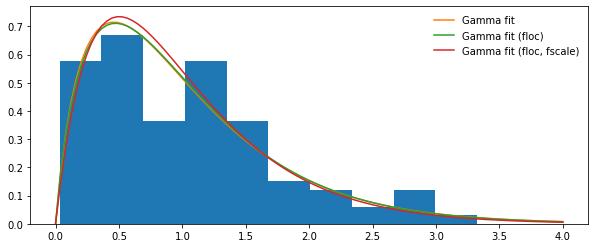

In [6]:
fig = plt.figure(figsize=(10, 4))

x = np.linspace(0, 4, 100)
y = gamma.pdf(x, result[0], result[1], result[2]) # unknown the location and shape
y_floc = gamma.pdf(x, result_floc[0], result_floc[1], result_floc[2]) # given location
y_floc_fscale = gamma.pdf(x, result_floc_fscale[0], result_floc_fscale[1], result_floc_fscale[2]) # given location and shape

ax = fig.add_subplot(111)

freqs, bins, patches = ax.hist(data_gamma, density = True)

ax.plot(x, y, label='Gamma fit')
ax.plot(x, y_floc, label='Gamma fit (floc)')
ax.plot(x, y_floc_fscale, label='Gamma fit (floc, fscale)')

plt.legend(frameon = False)
plt.show()

#### Try to run the above example with more samples!